In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df = pd.read_csv('salary_data.csv')

# Display the first few rows to understand the data
print(df.head())


   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [5]:
# Check for missing values
print(df.isnull().sum())

# Split the data into features (X) and target variable (y)
X = df[['YearsExperience']]
y = df['Salary']


YearsExperience    0
Salary             0
dtype: int64


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 49830096.85590839


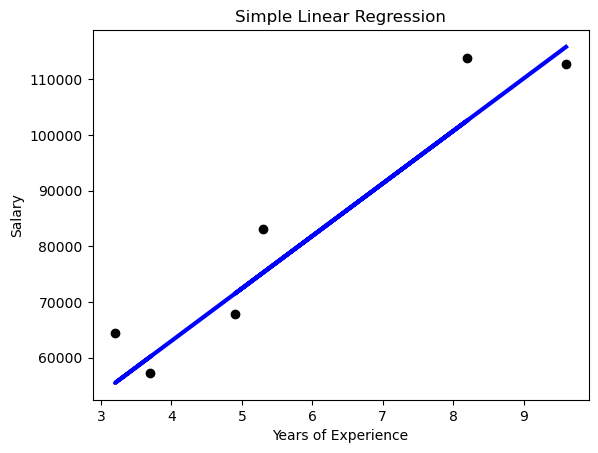

In [9]:
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()


In [23]:
import numpy as np

df['Log_Salary'] = np.log1p(df['Salary'])


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Standardized_YearsExperience'] = scaler.fit_transform(df[['YearsExperience']])


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['MinMax_Salary'] = scaler.fit_transform(df[['Salary']])


In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['YearsExperience']])
df['YearsExperience_squared'] = X_poly[:, 2]  # Select the squared feature


In [21]:
df['Experience_Category'] = pd.cut(df['YearsExperience'], bins=[-float('inf'), 5, 10, float('inf')], labels=['Low', 'Medium', 'High'])


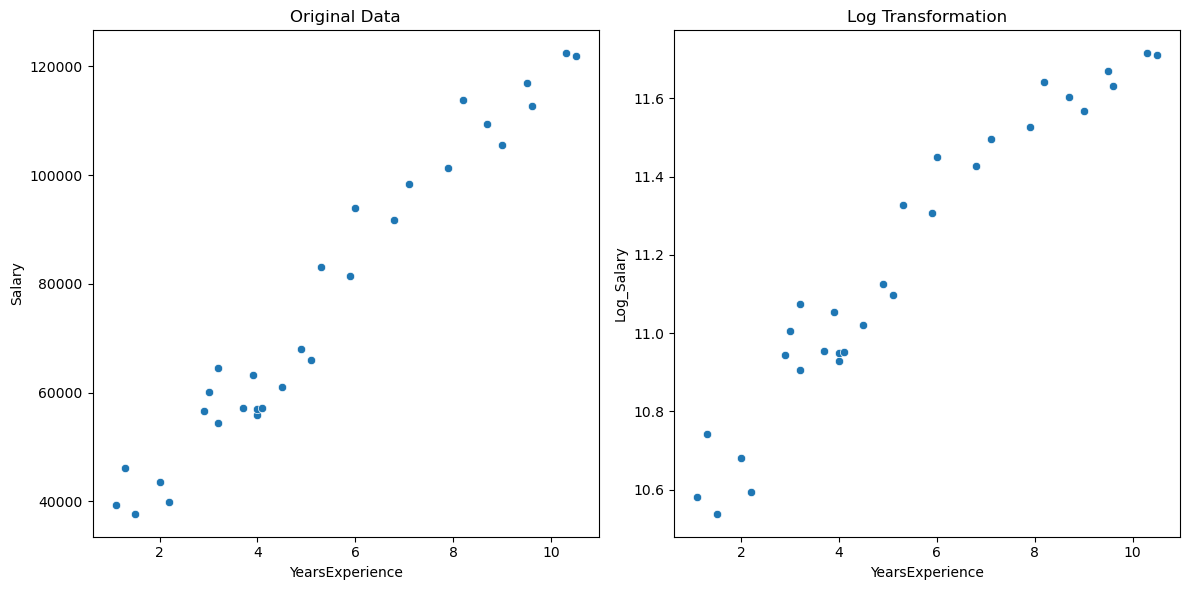

In [26]:
import seaborn as sns

# Assuming 'data' is your DataFrame after applying transformations

# Visualization 1: Log Transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.scatterplot(x='YearsExperience', y='Log_Salary', data=df)
plt.title('Log Transformation')

plt.tight_layout()
plt.show()



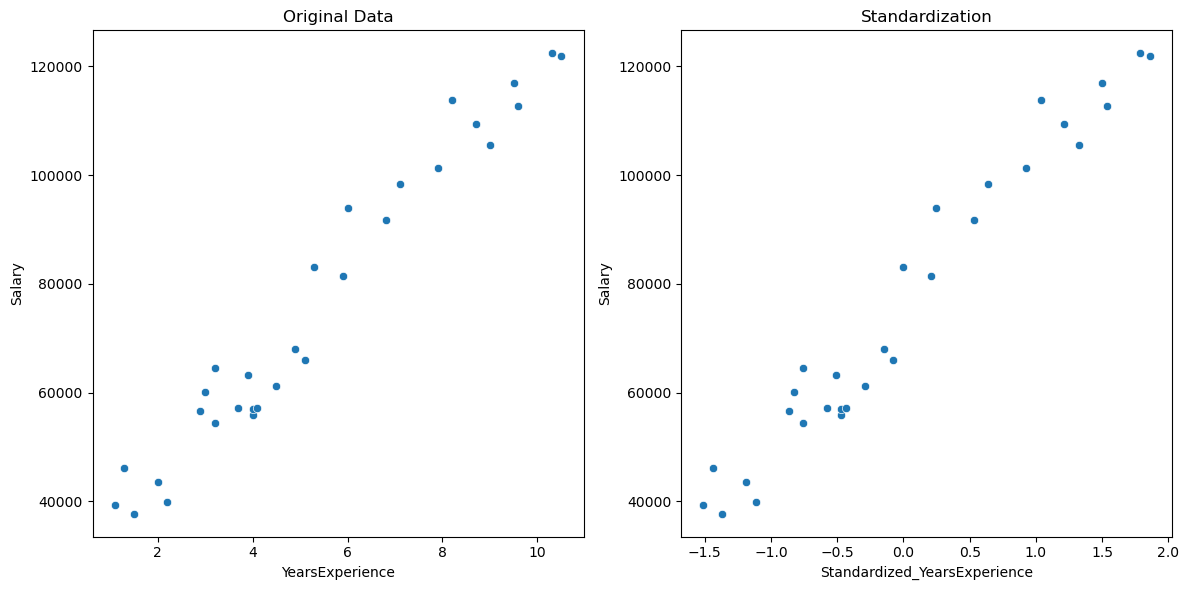

In [27]:
# Visualization 2: Standardization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Standardized_YearsExperience', y='Salary', data=df)
plt.title('Standardization')

plt.tight_layout()
plt.show()



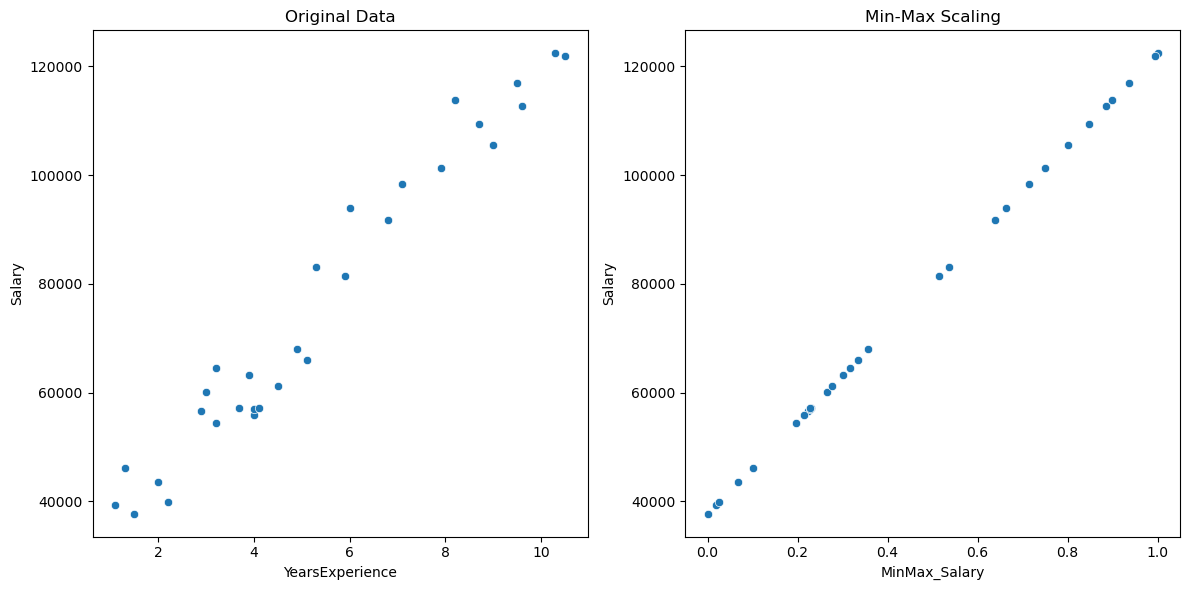

In [29]:
# Visualization 3: Min-Max Scaling
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.scatterplot(x='MinMax_Salary', y='Salary', data=df)
plt.title('Min-Max Scaling')

plt.tight_layout()
plt.show()


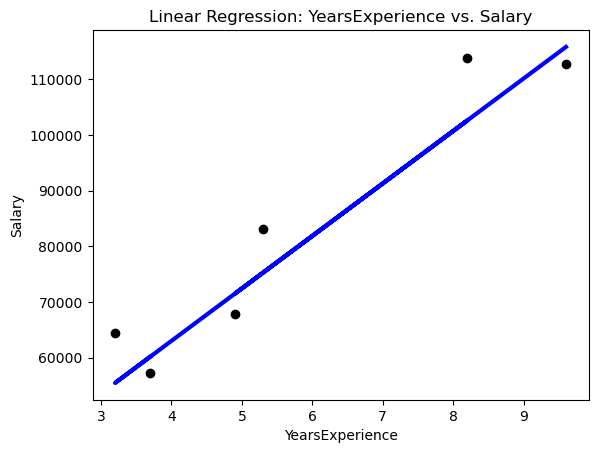

In [30]:
# Visualize the Regression Line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Linear Regression: YearsExperience vs. Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()